In [13]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sb
from sklearn.metrics import precision_score, recall_score, f1_score

In [2]:
def load_data(directory, file_name, names=None, header=None, skiprows=0):
    return pd.read_excel(os.path.join(directory, file_name), names=names, header=header, skiprows=skiprows, skipinitialspace=True)

In [3]:
def load_csv_data(directory, file_name, names=None, header=None, skiprows=0, skipinitialspace=True):
    return pd.read_csv(os.path.join(directory, file_name), names=names, header=header, skiprows=skiprows, skipinitialspace=skipinitialspace)

In [77]:
def using_model(model, scoring, cv):
    print("****************** {} ******************".format(model))
    if scoring is not None:
        scores_ = cross_val_score(model, X_train, Y_train, scoring=scoring, cv=cv)
        print("scoring={} cv={}".format(scoring, cv), scores_.mean(), scores_.std())
    model.fit(X_train, Y_train)
    Y_predict = model.predict(X_test)
    print("accuracy_score=", accuracy_score(Y_test, Y_predict))
    print("precision_score=", precision_score(Y_test, Y_predict, average='micro'))
    print("recall_score=", recall_score(Y_test, Y_predict, average='micro'))

In [28]:
def confusion_matrix(model, X_train, Y_train):
    from sklearn.metrics import confusion_matrix

    y_scores_ = cross_val_predict(model, X_train, Y_train, cv=3, method="decision_function")
    model.fit(X_train, Y_train)
    Y_predict = model.predict(X_train)
    conf_mx = confusion_matrix(Y_train, Y_predict)
    plt.matshow(conf_mx, cmap=plt.cm.gray)
#     print("accuracy_score=", accuracy_score(Y_train, Y_predict))
#     print("precision_score=", precision_score(Y_train, Y_predict))
#     print("recall_score=", recall_score(Y_train, Y_predict))
    print(lb.classes_)
    print(lb.transform(lb.classes_))
    print(conf_mx)
    row_sums = conf_mx.sum(axis=1, keepdims=True)
    norm_conf_mx = conf_mx / row_sums

    np.fill_diagonal(norm_conf_mx, 0)
    plt.matshow(norm_conf_mx, cmap=plt.cm.gray)

In [6]:
base_directory = '~/workspace/personal/datasets/DryBeanDataset'

columns = ['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 
           'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1',
           'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4']


In [7]:
dry_bean_df = pd.read_excel(os.path.join(base_directory, 'Dry_Bean_Dataset.xlsx'))
print(list(dry_bean_df))

['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength', 'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent', 'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3', 'ShapeFactor4', 'Class']


In [17]:
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
    ])

ct = ColumnTransformer([
        ("norm2", num_pipeline, columns)
])

lb = LabelEncoder()

X_train_set = dry_bean_df.drop(['Class'], axis=1)
Y_train_set = dry_bean_df['Class'].copy()

X_train = ct.fit_transform(X_train_set)
Y_train = lb.fit_transform(Y_train_set)

### Cross Validate with decision function

['BARBUNYA' 'BOMBAY' 'CALI' 'DERMASON' 'HOROZ' 'SEKER' 'SIRA']
[0 1 2 3 4 5 6]
[[1199    0   73    0    4    9   37]
 [   0  522    0    0    0    0    0]
 [  45    0 1538    0   26    4   17]
 [   2    0    0 3253    6   51  234]
 [   4    0   26   17 1843    0   38]
 [  19    0    1   27    1 1918   61]
 [   4    0    7  229   48   37 2311]]


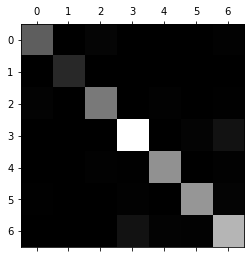

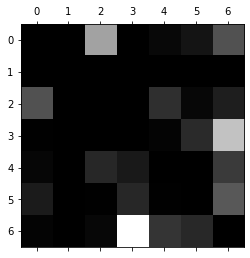

In [29]:
confusion_matrix(LogisticRegression(max_iter=500, multi_class="multinomial"), X_train, Y_train)

In [38]:
using_model(LogisticRegression(max_iter=500, multi_class="multinomial"), 'accuracy', cv=10)

****************** LogisticRegression(max_iter=500, multi_class='multinomial') ******************
scoring=accuracy cv=10 0.8953974306272597 0.13410448264510003
accuracy_score= 0.9245463228271251
precision_score= 0.9245463228271251
recall_score= 0.9245463228271251


In [76]:
bean_df = load_csv_data('~/workspace/personal/datasets/DryBeanDataset', 'Dry_Bean_Dataset_testing.csv', names=columns + ['Class'], skiprows=1)

X_test = ct.transform(bean_df.drop('Class', axis=1))
Y_test = lb.transform(bean_df['Class'])

### Overfitting 

In [78]:
using_model(DecisionTreeClassifier(), 'accuracy', cv=10)

****************** DecisionTreeClassifier() ******************
scoring=accuracy cv=10 0.6884306477594324 0.1640293404183299
accuracy_score= 1.0
precision_score= 1.0
recall_score= 1.0


In [81]:
using_model(RandomForestClassifier(), 'accuracy', cv=10)

****************** RandomForestClassifier() ******************
scoring=accuracy cv=10 0.728841948079552 0.1905631777108822
accuracy_score= 1.0
precision_score= 1.0
recall_score= 1.0


In [83]:
using_model(SGDClassifier(), 'accuracy', cv=10)

****************** SGDClassifier() ******************
scoring=accuracy cv=10 0.897822388090298 0.12786903724569432
accuracy_score= 0.9144074645507311
precision_score= 0.9144074645507311
recall_score= 0.9144074645507311
